This notebook is for carrying out the analysis asked by Mario

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '/home/federico/Università/Tesi_magistrale/my_programs/')

from contact_matrix_utils import *
import settings
from src.slice_pairwise import *
from src.interchromosomal_cosegregation import *
from numpy.random import Generator, MT19937
from scipy.stats import pearsonr, spearmanr

import seaborn as sns

In [2]:
def chromosome_bin_lenght(segregation_table, chrom):
    return np.ceil(segregation_table[chrom]['stop_position'][-1]/resolution).astype(int)

def select_chromosomes_coordinates(chrA, chrB, chr_windows_sizes):
    if(chrA==0 or chrB ==0):
        print("0 is not accepted as chromosome index ")
        return

    chrA_idx, chrB_idx = chrA - 1, chrB - 1

    if(chrA_idx>chrB_idx):
        chrA_idx, chrB_idx = chrB_idx, chrA_idx

    start_row    = np.sum(chr_windows_sizes[:chrA_idx])
    stop_row     = start_row + chr_windows_sizes[chrA_idx]
    start_column = np.sum(chr_windows_sizes[:chrB_idx])
    stop_column  = start_column + chr_windows_sizes[chrB_idx]

    return start_row, stop_row, start_column, stop_column

which_beta = "$\\beta$ evaluated | 1/2"

# segregation table import #

In [3]:
name_root_1NP_1Mb = "mesc_46C_1Mb_481x1"

if(name_root_1NP_1Mb!= settings.name_root):
    raise ValueError("Change name_root in settings.py and then restart the notebook")

path_2 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_1NP_1Mb + "/"
file_name_2 = "segregation_" + name_root_1NP_1Mb +  ".pkl"
with open(path_2 + file_name_2, 'rb') as f:
    segregation_table_1NP_1Mb = pickle.load(f)

start_chr, stop_chr = 1, 19
stop_chr += 1
chromosomes = []
n_chromosomes = stop_chr - start_chr

l = []
size = 0

for i in range(start_chr, stop_chr):
    chrA = 'chr' + str(i)
    chromosomes += [chrA]
    s = segregation_table_1NP_1Mb[chrA]['segregation_table'].shape[0]
    size += s
    l.append(s) 

chr_windows_sizes = np.array(l)


# Statistics of $\pi$ in chr7 and 12 #

nan percentage in cosegregation

la percentuale dei nan nelle pi è esattamente corrispondente alla percentuale di nan nelle coseg, l'unica cosa a cui porre attenzione è che questa percentuale viene calcolata sulle squareform i.e. escludendo totalmente la diagonale

## intra 1NP ##

In [4]:
from src.slice_pairwise import single_chromosome

Questo è un breve test anche dell'impatto che la sequenza di numeri random utilizzata ha sulle pi

in intra non ha praticamente alcun effetto (come è corretto aspettarsi):\
cabiare seed nel caso in cui fornisco un generatore esterno o usare il generatore di default da gli stessi risultati sia sul cromosoma 7 che sul 12

### chromosome 7 ###

In [5]:
s = 13515461
rg = Generator(MT19937(s))
print("Chromosome 7 1NP 1Mb, seed = ", s , ":\n")


chr7_1NP_1Mb_pi, chr7_1NP_1Mb_sign_pi = single_chromosome('chr7', segregation_table_1NP_1Mb['chr7']['segregation_table'],  95, verbose= True, save= False, ret= True, generator = rg)

del rg, s

Chromosome 7 1NP 1Mb, seed =  13515461 :


Computing PIs for chr7 ...
% of NaN PI values: 40.21728861596599 %
% of PI < 0 (out of non-nans): 51.56447534766119 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 8.501896333754742 %
Mean PI value: 0.03476849942894445
STD PI value: 0.025901864516046313
Mean SIGNIFICATIVE PI value: 0.07823950218817258
STD SIGNIFICATIVE PI value: 0.017327469392178812
Done



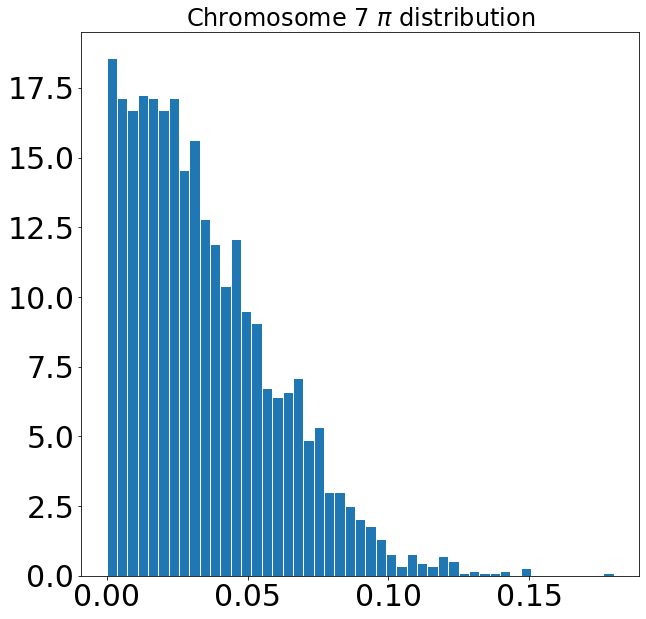

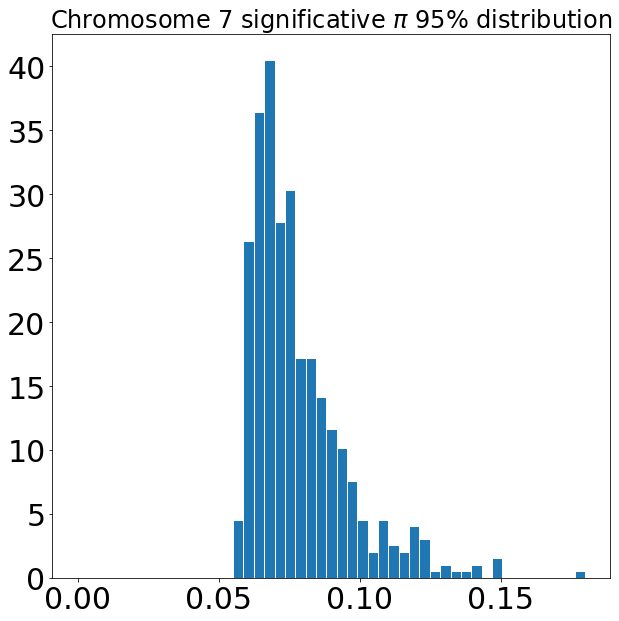

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr7_1NP_1Mb_pi.flatten(), bins = np.linspace(0,np.nanmax(chr7_1NP_1Mb_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("Chromosome 7 $\pi$ distribution", fontsize = 24);

del fig, ax

fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr7_1NP_1Mb_sign_pi.flatten(), bins = np.linspace(0,np.nanmax(chr7_1NP_1Mb_sign_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("Chromosome 7 significative $\pi$ 95% distribution", fontsize = 24);

del fig, ax

### chromosome 12 ###

In [7]:
s = 213515
rg = Generator(MT19937(s))

print("Chromosome 12 1NP 1Mb, seed = ", s , ":\n")

chr12_1NP_1Mb_pi, chr12_1NP_1Mb_sign_pi = single_chromosome('chr12', segregation_table_1NP_1Mb['chr12']['segregation_table'],  95, verbose= True, save= False, ret= True, generator = rg)


Chromosome 12 1NP 1Mb, seed =  213515 :


Computing PIs for chr12 ...
% of NaN PI values: 12.837465564738295 %
% of PI < 0 (out of non-nans): 51.374841972187106 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 9.054993678887485 %
Mean PI value: 0.03635792045282073
STD PI value: 0.02692141391315963
Mean SIGNIFICATIVE PI value: 0.0802780759368206
STD SIGNIFICATIVE PI value: 0.018304459926877403
Done



In [8]:
0.09054993678887485 * (1 - 0.12837465564738295)

0.07892561983471075

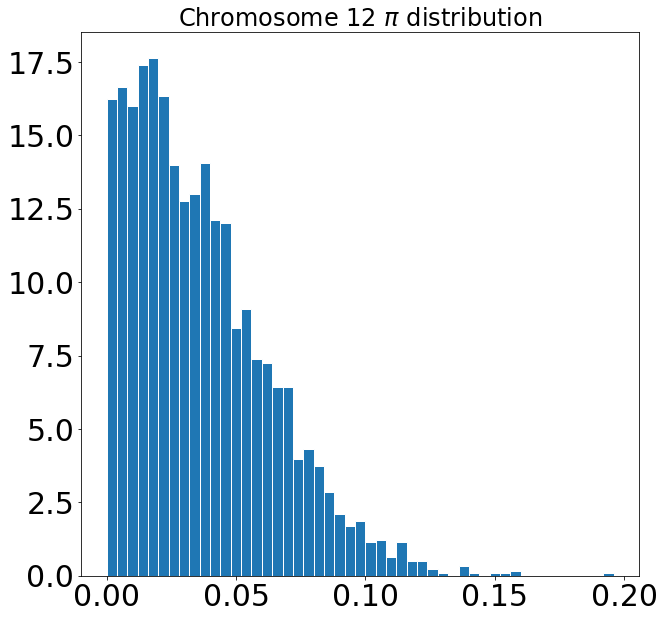

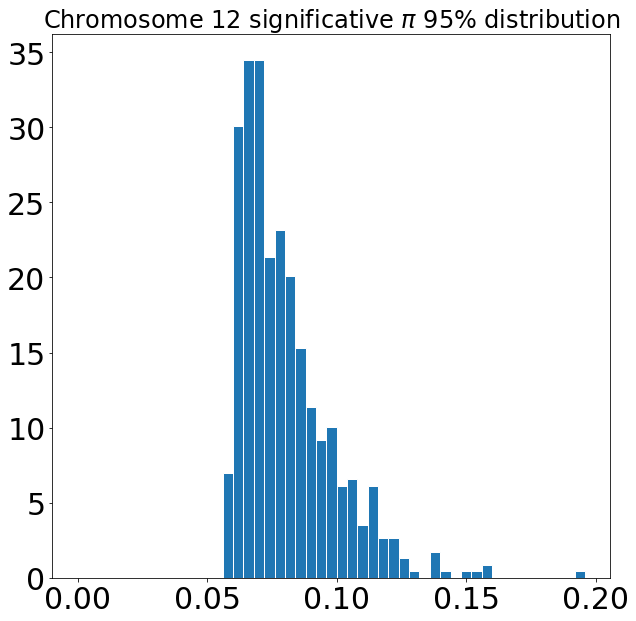

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr12_1NP_1Mb_pi.flatten(), bins = np.linspace(0,np.nanmax(chr12_1NP_1Mb_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("Chromosome 12 $\pi$ distribution", fontsize = 24);

del fig, ax

fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr12_1NP_1Mb_sign_pi.flatten(), bins = np.linspace(0,np.nanmax(chr12_1NP_1Mb_sign_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("Chromosome 12 significative $\pi$ 95% distribution", fontsize = 24);

del fig, ax

## Heatmaps ##

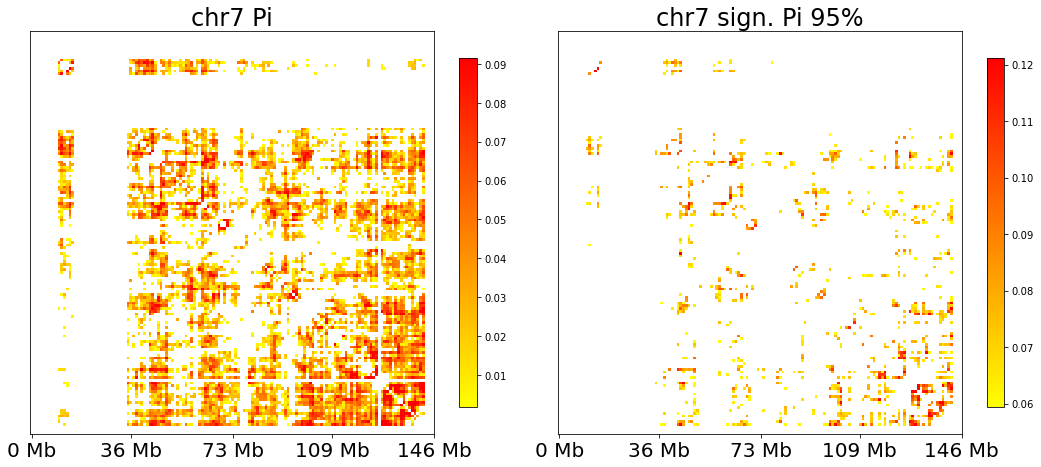

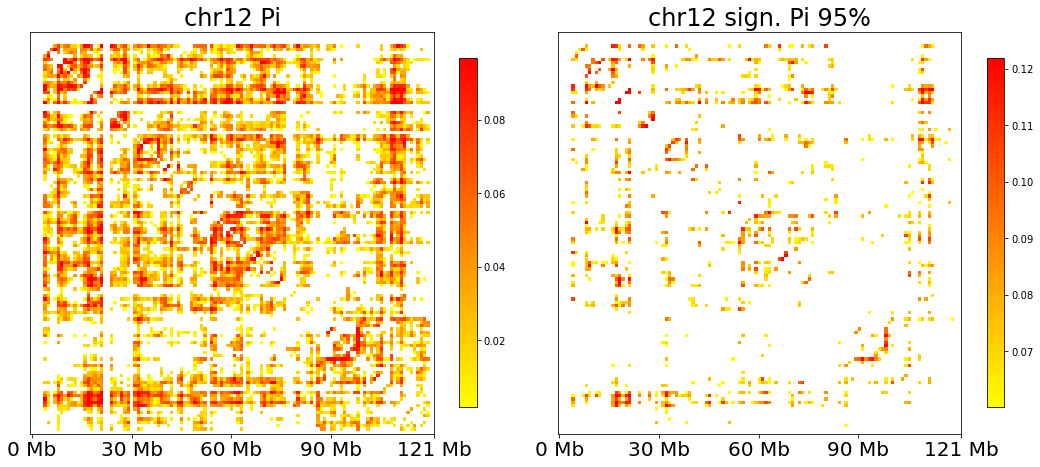

In [10]:
fig1, ax1 = plot_multiple_heatmaps(n_mats=2, mats=[chr7_1NP_1Mb_pi, chr7_1NP_1Mb_sign_pi], vmin = [np.nanpercentile(chr7_1NP_1Mb_pi, 3), np.nanpercentile(chr7_1NP_1Mb_sign_pi, 3)], vmax = [np.nanpercentile(chr7_1NP_1Mb_pi, 97), np.nanpercentile(chr7_1NP_1Mb_sign_pi, 97)], x_figsize=15, y_figsize=10, colormap="autumn_r");
chr7_ticks = np.linspace(0, chr7_1NP_1Mb_pi.shape[0], 5, dtype=int)
chr7_tick_labels = [str(i) + " Mb" for i in chr7_ticks]
ax1[0].set_xticks(chr7_ticks)
ax1[0].set_yticks([])
ax1[0].set_xticklabels(chr7_tick_labels, fontsize = 20);
ax1[1].set_xticks(chr7_ticks)
ax1[1].set_yticks([])
ax1[1].set_xticklabels(chr7_tick_labels, fontsize = 20);

ax1[0].set_title("chr7 Pi", fontsize = 24);
ax1[1].set_title("chr7 sign. Pi 95%", fontsize = 24);


fig2, ax2 = plot_multiple_heatmaps(n_mats=2, mats=[chr12_1NP_1Mb_pi, chr12_1NP_1Mb_sign_pi], vmin = [np.nanpercentile(chr12_1NP_1Mb_pi, 3), np.nanpercentile(chr12_1NP_1Mb_sign_pi, 3)], vmax = [np.nanpercentile(chr12_1NP_1Mb_pi, 97), np.nanpercentile(chr12_1NP_1Mb_sign_pi, 97)], x_figsize=15, y_figsize=10, colormap="autumn_r");
chr12_ticks = np.linspace(0, chr12_1NP_1Mb_pi.shape[0], 5, dtype=int)
chr12_tick_labels = [str(i) + " Mb" for i in chr12_ticks]
ax2[0].set_xticks(chr12_ticks)
ax2[0].set_yticks([])
ax2[0].set_xticklabels(chr12_tick_labels, fontsize = 20);
ax2[1].set_xticks(chr12_ticks)
ax2[1].set_yticks([])
ax2[1].set_xticklabels(chr12_tick_labels, fontsize = 20);

ax2[0].set_title("chr12 Pi", fontsize = 24);
ax2[1].set_title("chr12 sign. Pi 95%", fontsize = 24);

Questo di seguito è solo un test per calcolare le beta 

In [11]:
from src.slice_pairwise_inter_beta_evaluation import compute_s_mat_inter as compute_s_mat_inter_beta_eval

In [12]:
F_arr_A, F_arr_B = compute_tube_segregation_frequency_inter(segregation_table_1NP_1Mb['chr7']['segregation_table'], segregation_table_1NP_1Mb['chr12']['segregation_table'])
F_mat = compute_tube_cosegregation_matrix_offdiag(segregation_table_1NP_1Mb['chr7']['segregation_table'], segregation_table_1NP_1Mb['chr12']['segregation_table'])

F_mat[:, np.isnan(F_arr_B)] = np.nan
F_mat[np.isnan(F_arr_A), :] = np.nan

s_mat = compute_s_mat_inter_beta_eval(F_arr_A, F_arr_B, F_mat, effective_NPs_per_tube, F_mean)
print(np.nanmean(s_mat))

del F_arr_A, F_arr_B, F_mat, s_mat

0.9376236281982165


## stats ##

In [13]:
# temp = np.copy(chr7_1NP_1Mb_coseg)
# temp[temp == 0] = np.nan
# print( "Fraction of diagonal\t\t\t\t" , chr7_1NP_1Mb_coseg.shape[0] / chr7_1NP_1Mb_coseg.size *100 , "%")
# print( "Fraction of GAM nan\t\t\t\t" , np.sum(np.isnan(temp)) / chr7_1NP_1Mb_coseg.size *100 , "%")

# print( "Fraction of significative pi\t\t\t" , np.sum(~np.isnan(chr7_1NP_1Mb_sign_pi)) / chr7_1NP_1Mb_coseg.size * 100, "%")
# print( "Fraction of significative pi excluded GAM nan\t" , np.sum(~np.isnan(chr7_1NP_1Mb_sign_pi)) / np.sum(~np.isnan(temp)) *100 , "%")
# print( "Fraction of significative pi excluded all nan\t" , np.sum(~np.isnan(chr7_1NP_1Mb_sign_pi)) / np.sum(~np.isnan(chr7_1NP_1Mb_pi)) *100 , "%" )


In [14]:
0.0850 * (1 - 0.402)

0.05083

# Cosegregations of chr7 and chr12 #

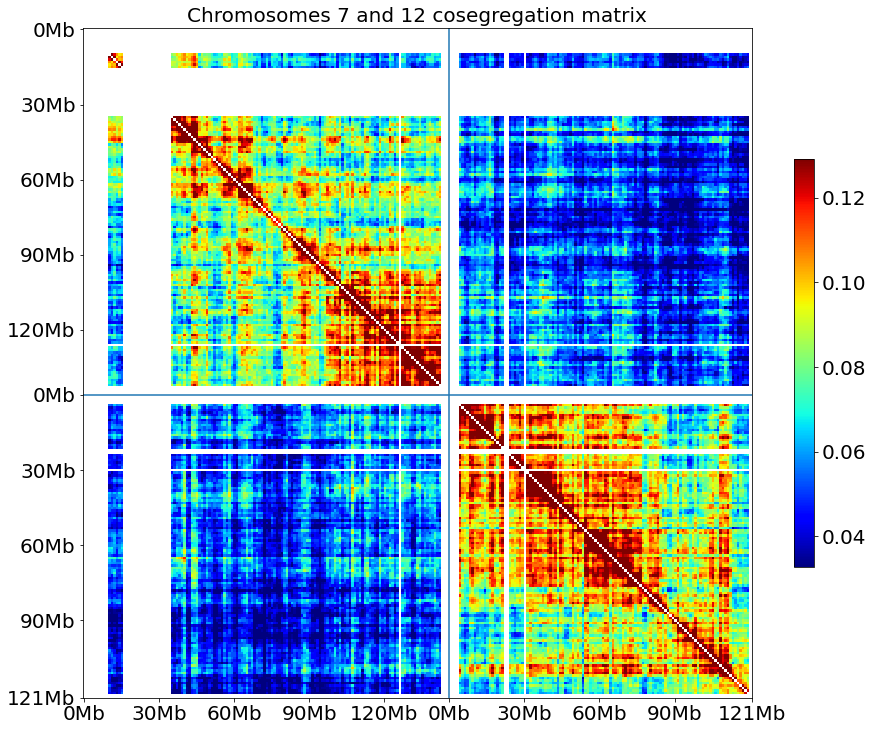

In [15]:
chr7_1NP_1Mb_coseg = compute_tube_cosegregation_matrix(segregation_table_1NP_1Mb['chr7']['segregation_table'])
chr12_1NP_1Mb_coseg = compute_tube_cosegregation_matrix(segregation_table_1NP_1Mb['chr12']['segregation_table'])
chr7_12_1NP_1Mb_coseg = compute_tube_cosegregation_matrix_offdiag(segregation_table_1NP_1Mb['chr7']['segregation_table'], segregation_table_1NP_1Mb['chr12']['segregation_table'])

genomewide_coseg_1Mb_1NP, genomewide_nld_1Mb_1NP = compute_coseg_nld_genomewide(segregation_table_1NP_1Mb, 1, 19)

chr7_start, chr7_end, chr12_start, chr12_end = select_chromosomes_coordinates(7, 12, chr_windows_sizes)

matrix_coseg_up = np.hstack([genomewide_coseg_1Mb_1NP[chr7_start: chr7_end, chr7_start: chr7_end],  genomewide_coseg_1Mb_1NP[chr7_start: chr7_end, chr12_start: chr12_end]])
matrix_coseg_down = np.hstack([genomewide_coseg_1Mb_1NP[chr7_start: chr7_end, chr12_start: chr12_end].T,  genomewide_coseg_1Mb_1NP[chr12_start: chr12_end, chr12_start: chr12_end]])

matrix_coseg = np.vstack([matrix_coseg_up, matrix_coseg_down])

matrix_nld_up = np.hstack([genomewide_nld_1Mb_1NP[chr7_start: chr7_end, chr7_start: chr7_end],  genomewide_nld_1Mb_1NP[chr7_start: chr7_end, chr12_start: chr12_end]])
matrix_nld_down = np.hstack([genomewide_nld_1Mb_1NP[chr7_start: chr7_end, chr12_start: chr12_end].T,  genomewide_nld_1Mb_1NP[chr12_start: chr12_end, chr12_start: chr12_end]])

matrix_nld = np.vstack([matrix_nld_up, matrix_nld_down])

matrix_coseg[matrix_coseg == 0] = np.nan
matrix_nld[matrix_coseg == 0] = np.nan


fig, ax, c, _ = plot_heatmap(matrix_coseg, vmin = np.nanpercentile(matrix_coseg, 3), vmax = np.nanpercentile(matrix_coseg, 97) ,x_figsize=15, y_figsize=15, colormap="jet");

ticks_1 = [0,30,60,90,120] 
ticks_2 = [146, 176, 206, 236, 267]
tick_labels_1 = [ str(i) + "Mb" for i in ticks_1]
tick_labels_2 = [ str(i-146) + "Mb" for i in ticks_2]

ax.set_xticks(ticks_1 + ticks_2)
ax.set_xticklabels(tick_labels_1 + tick_labels_2, fontsize = 20)
ax.set_yticks(ticks_1 + ticks_2)
ax.set_yticklabels(tick_labels_1 + tick_labels_2, fontsize = 20)

c.ax.tick_params(axis='y', which='major', labelsize=20)

ax.axvline(146);
ax.axhline(146);

ax.set_title("Chromosomes 7 and 12 cosegregation matrix", fontsize = 20);


del fig, ax, genomewide_coseg_1Mb_1NP, genomewide_nld_1Mb_1NP,chr7_start, chr7_end, chr12_start, chr12_end



# $\beta = 1$ vs $\beta$ evaluated # 

In [16]:
from src.slice_pairwise_inter import inter_chromosome as inter_chromosome_beta_1
from src.slice_pairwise_inter_beta_evaluation import inter_chromosome as inter_chromosome_beta_eval

In [17]:
s = 9564154
rg = Generator(MT19937(s))

print("Chromosome 7 and 12 1NP 1Mb", ", beta = 1", ", seed = ", s , ":\n")

chr7_12_1NP_1Mb_pi_beta_1, chr7_12_1NP_1Mb_sign_pi_beta_1 = inter_chromosome_beta_1(segregation_table_1NP_1Mb['chr7']['segregation_table'], segregation_table_1NP_1Mb['chr12']['segregation_table'] , 'chr7', 'chr12', 95, verbose= True, save= False, ret= True, generator = rg)
del s, rg

s = 61468952
rg = Generator(MT19937(s))

print("Chromosome 7 and 12 1NP 1Mb", ", beta evaluated", ", seed = ", s , ":\n")

chr7_12_1NP_1Mb_pi_beta_eval, chr7_12_1NP_1Mb_sign_pi_beta_eval = inter_chromosome_beta_eval(segregation_table_1NP_1Mb['chr7']['segregation_table'], segregation_table_1NP_1Mb['chr12']['segregation_table'] , 'chr7', 'chr12', 95, verbose= True, save= False, ret= True, generator = rg)

Chromosome 7 and 12 1NP 1Mb , beta = 1 , seed =  9564154 :


Computing inter PIs for chr7 and chr12 ...
% of NaN PI values: 27.71991395901732 %
% of PI < 0 (out of non-nans): 55.37630198136111 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 5.7639595896311375 %
Mean PI value: 0.026349645974279384
STD PI value: 0.020087651824576613
Mean SIGNIFICATIVE PI value: 0.06459109109586217
STD SIGNIFICATIVE PI value: 0.013373200463272344
Done

Chromosome 7 and 12 1NP 1Mb , beta evaluated , seed =  61468952 :


Computing inter PIs for chr7 and chr12 ...
% of NaN PI values: 27.71991395901732 %
% of PI < 0 (out of non-nans): 50.16054507009163 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 8.2935233769285 %
Mean PI value: 0.02825848820268811
STD PI value: 0.020882088723491482
Mean SIGNIFICATIVE PI value: 0.06380413349210808
STD SIGNIFICATIVE PI value: 0.013918006774657404
beta: 0.9376236281982165
Done



In [18]:
(1 - 0.2771991395901732) * 0.082935233769285

0.059945658326729316

## Heatmaps ##

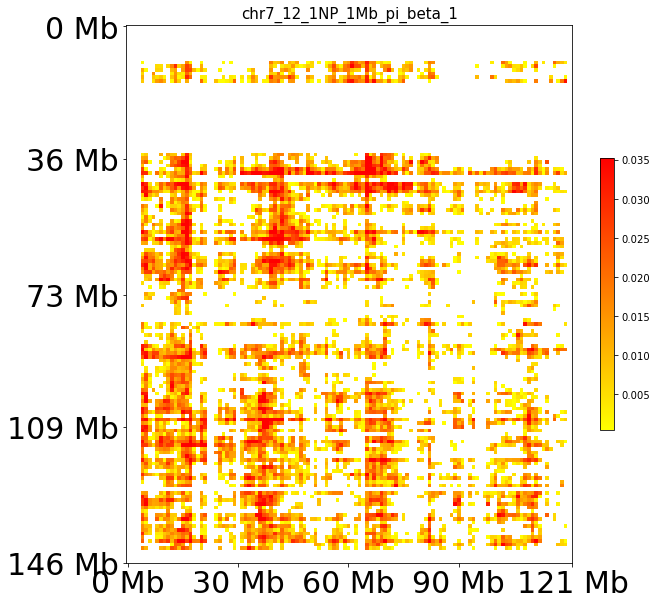

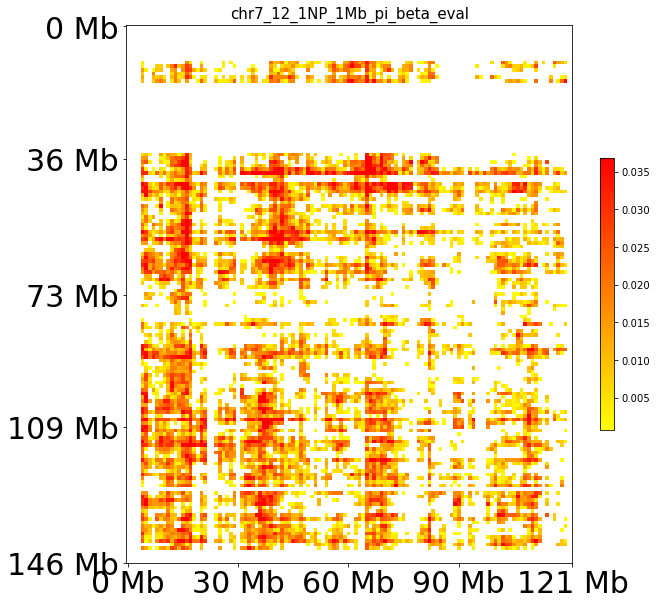

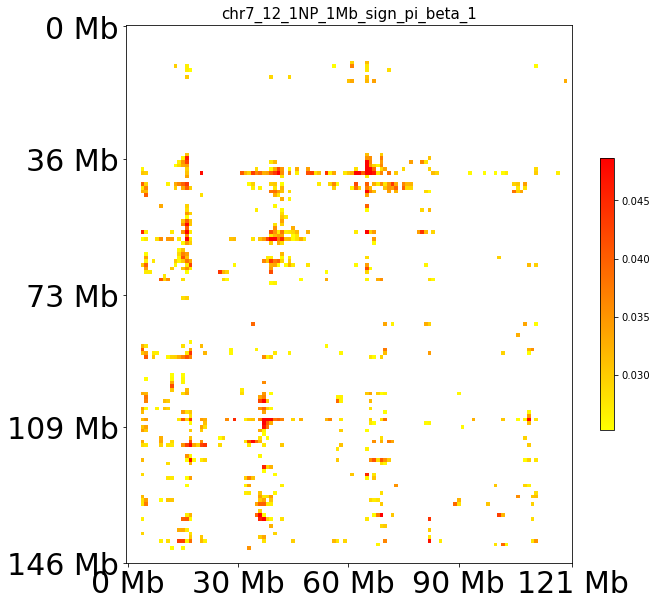

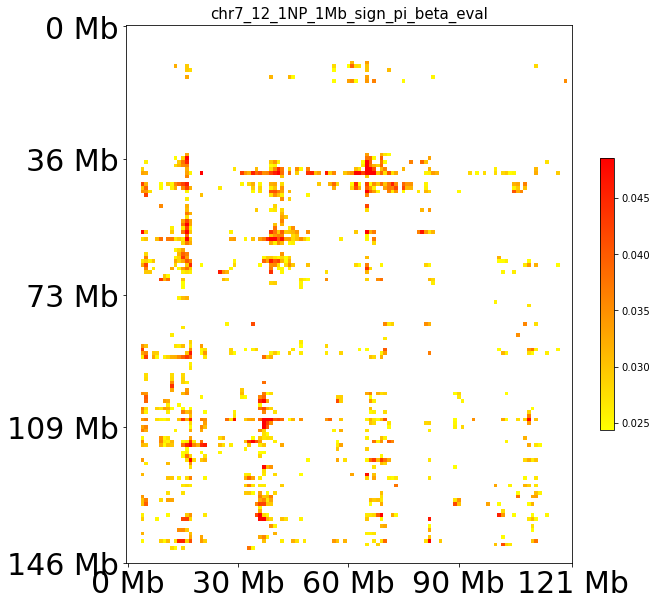

In [19]:
fig1, ax1, _, _ = plot_heatmap(chr7_12_1NP_1Mb_pi_beta_1, x_figsize=10, y_figsize=10, title = "chr7_12_1NP_1Mb_pi_beta_1" , colormap="autumn_r");
fig2, ax2, _, _ = plot_heatmap(chr7_12_1NP_1Mb_pi_beta_eval, x_figsize=10, y_figsize=10, title = "chr7_12_1NP_1Mb_pi_beta_eval", colormap="autumn_r");
fig3, ax3, _, _ = plot_heatmap(chr7_12_1NP_1Mb_sign_pi_beta_1, x_figsize=10, y_figsize=10, title = "chr7_12_1NP_1Mb_sign_pi_beta_1", colormap="autumn_r");
fig4, ax4, _, _ = plot_heatmap(chr7_12_1NP_1Mb_sign_pi_beta_eval, x_figsize=10, y_figsize=10, title = "chr7_12_1NP_1Mb_sign_pi_beta_eval", colormap="autumn_r");

chr7_ticks = np.linspace(0, chr7_12_1NP_1Mb_pi_beta_1.shape[1], 5, dtype=int)
chr7_tick_labels = [str(i) + " Mb" for i in chr7_ticks]

chr12_ticks = np.linspace(0, chr7_12_1NP_1Mb_pi_beta_1.shape[0], 5, dtype=int)
chr12_tick_labels = [str(i) + " Mb" for i in chr12_ticks]

for i in [ax1, ax2, ax3, ax4]:
    i.set_xticks(chr7_ticks)
    i.set_yticks(chr12_ticks)
    i.set_xticklabels(chr7_tick_labels, fontsize = 30);
    i.set_yticklabels(chr12_tick_labels, fontsize = 30);


## Histograms ##

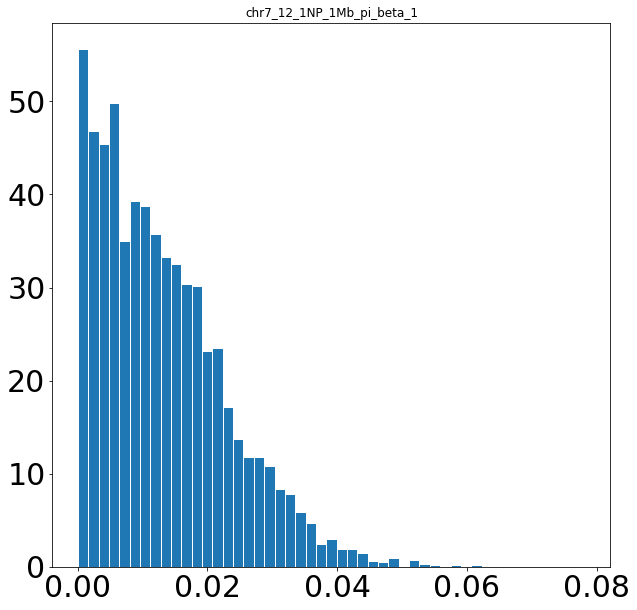

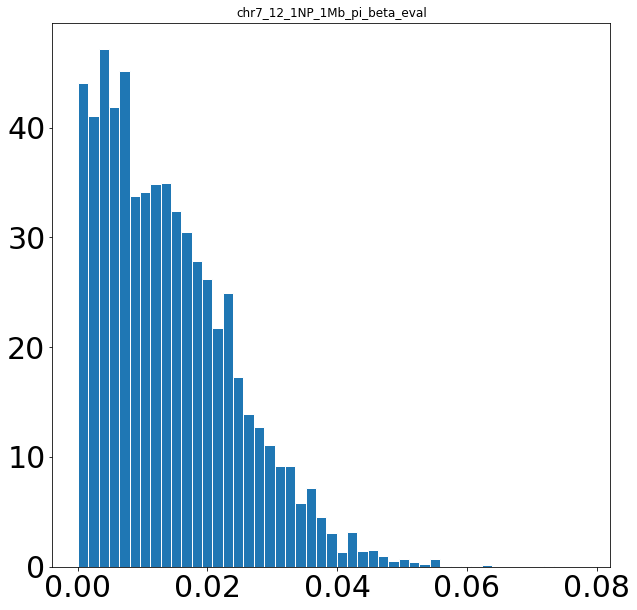

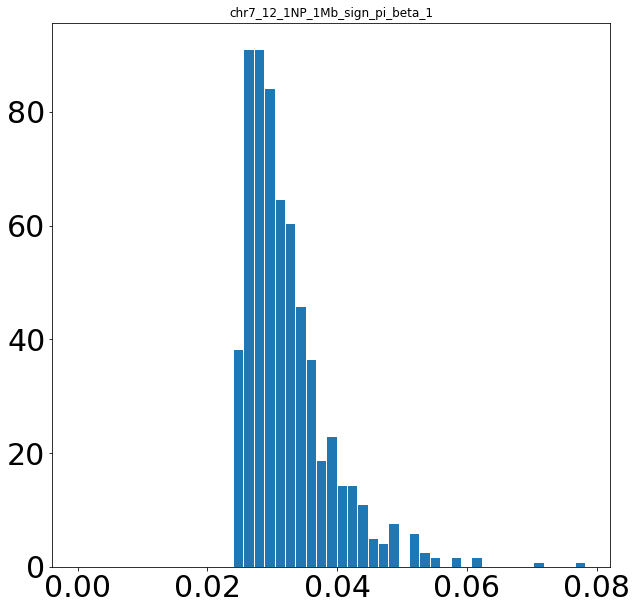

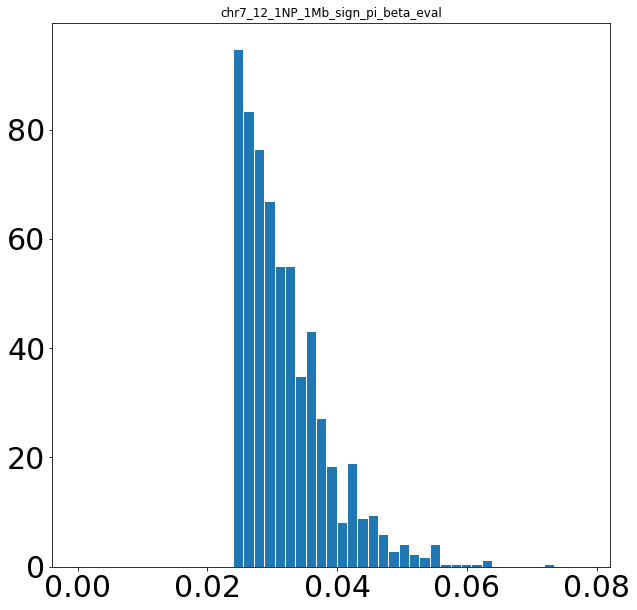

In [20]:
fig1, ax1 = plt.subplots(1, figsize = (10,10))
fig2, ax2 = plt.subplots(1, figsize = (10,10))
fig3, ax3 = plt.subplots(1, figsize = (10,10))
fig4, ax4 = plt.subplots(1, figsize = (10,10))

A = ax1.hist(chr7_12_1NP_1Mb_pi_beta_1.flatten(), bins = np.linspace(0,np.nanmax(chr7_12_1NP_1Mb_pi_beta_1), 50), edgecolor = "white", density = True)
ax1.set_title("chr7_12_1NP_1Mb_pi_beta_1")

B = ax2.hist(chr7_12_1NP_1Mb_pi_beta_eval.flatten(), bins = np.linspace(0,np.nanmax(chr7_12_1NP_1Mb_pi_beta_1), 50), edgecolor = "white", density = True)
ax2.set_title("chr7_12_1NP_1Mb_pi_beta_eval")

C = ax3.hist(chr7_12_1NP_1Mb_sign_pi_beta_1.flatten(), bins = np.linspace(0,np.nanmax(chr7_12_1NP_1Mb_pi_beta_1), 50), edgecolor = "white", density = True)
ax3.set_title("chr7_12_1NP_1Mb_sign_pi_beta_1")
D = ax4.hist(chr7_12_1NP_1Mb_sign_pi_beta_eval.flatten(), bins = np.linspace(0,np.nanmax(chr7_12_1NP_1Mb_pi_beta_1), 50), edgecolor = "white", density = True)
ax4.set_title("chr7_12_1NP_1Mb_sign_pi_beta_eval")

ax1.tick_params(axis='x', which='major', labelsize=30)
ax1.tick_params(axis='y', which='major', labelsize=30)
ax2.tick_params(axis='x', which='major', labelsize=30)
ax2.tick_params(axis='y', which='major', labelsize=30)
ax3.tick_params(axis='x', which='major', labelsize=30)
ax3.tick_params(axis='y', which='major', labelsize=30)
ax4.tick_params(axis='x', which='major', labelsize=30)
ax4.tick_params(axis='y', which='major', labelsize=30)


del A, B, C, D

## Stats ##

In [21]:
print( "chr7_12_1NP_1Mb_pi_beta_1:\t\t" , np.nanmean(chr7_12_1NP_1Mb_pi_beta_1),         np.nanstd(chr7_12_1NP_1Mb_pi_beta_1))
print( "chr7_12_1NP_1Mb_sign_pi_beta_1:\t\t" , np.nanmean(chr7_12_1NP_1Mb_sign_pi_beta_1),    np.nanstd(chr7_12_1NP_1Mb_sign_pi_beta_1))
print( "chr7_12_1NP_1Mb_pi_beta_eval:\t\t" , np.nanmean(chr7_12_1NP_1Mb_pi_beta_eval),      np.nanstd(chr7_12_1NP_1Mb_pi_beta_eval))
print( "chr7_12_1NP_1Mb_sign_pi_beta_eval:\t" , np.nanmean(chr7_12_1NP_1Mb_sign_pi_beta_eval), np.nanstd(chr7_12_1NP_1Mb_sign_pi_beta_eval))

chr7_12_1NP_1Mb_pi_beta_1:		 0.013174822987139692 0.010043825912288307
chr7_12_1NP_1Mb_sign_pi_beta_1:		 0.032295545547931084 0.006686600231636172
chr7_12_1NP_1Mb_pi_beta_eval:		 0.014129244101344056 0.010441044361745741
chr7_12_1NP_1Mb_sign_pi_beta_eval:	 0.03190206674605404 0.006959003387328702


# coseg - $\pi$ correlations #

SpearmanrResult(correlation=0.529153416787754, pvalue=0.0)
(0.5395418370429546, 0.0)
SpearmanrResult(correlation=0.5414247422471936, pvalue=0.0)
(0.5132995827091477, 0.0)
SpearmanrResult(correlation=0.8057355752465712, pvalue=0.0)
(0.8413535449544398, 0.0)
SpearmanrResult(correlation=0.8201762519148021, pvalue=0.0)
(0.8521491075597487, 0.0)


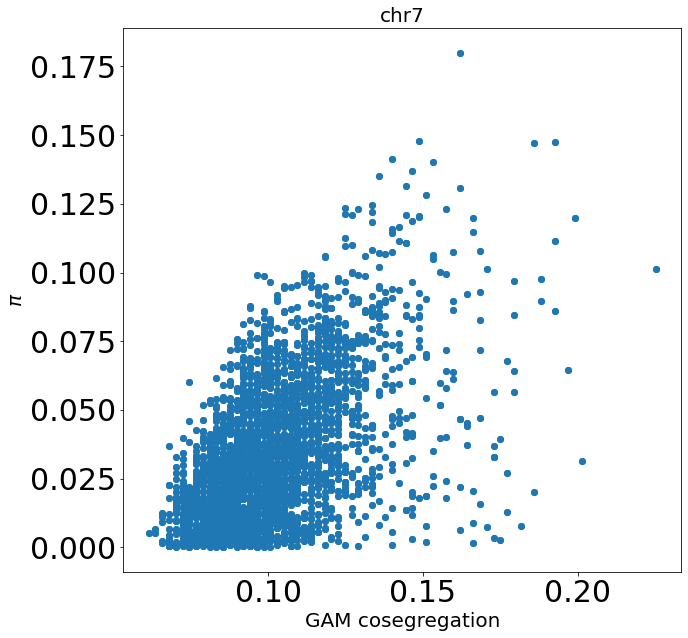

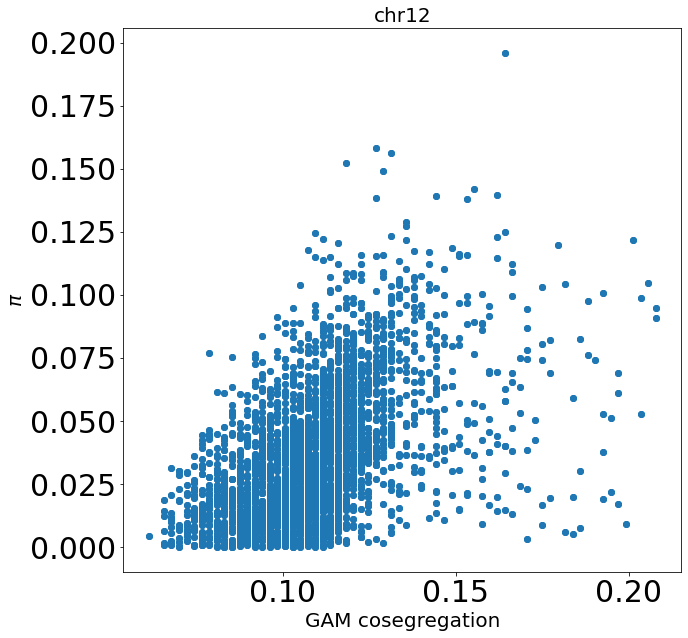

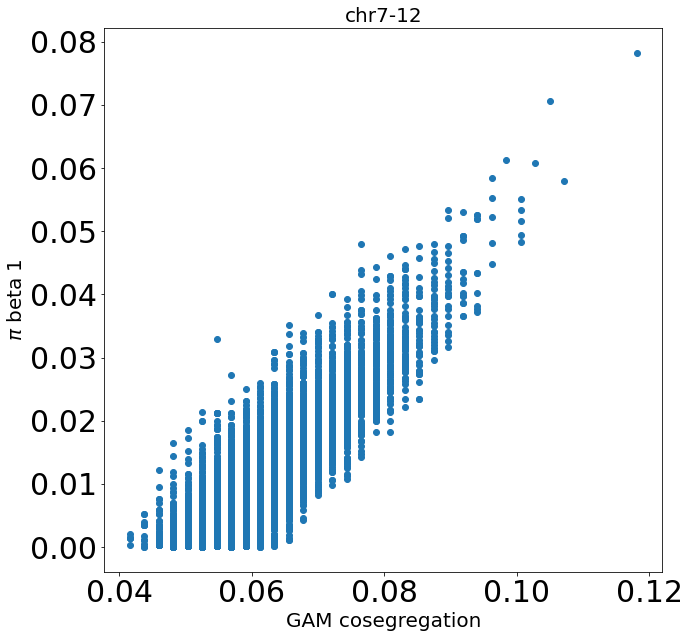

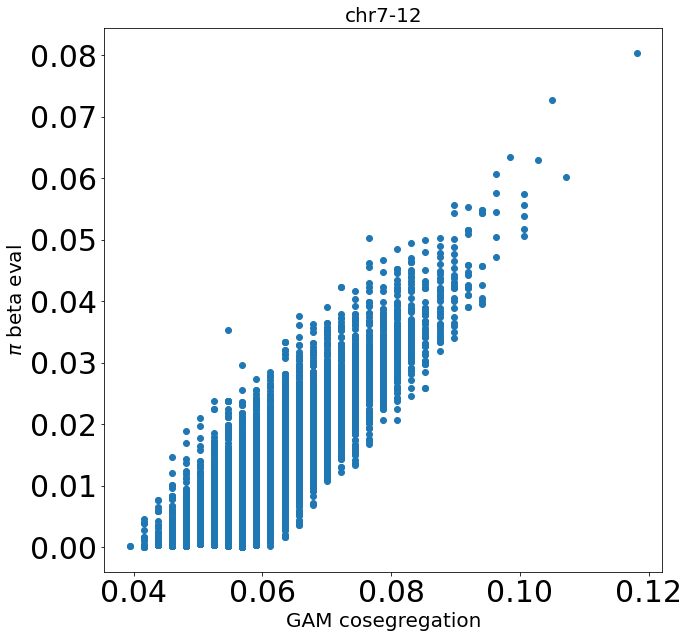

In [22]:
fig, ax = plt.subplots(1, figsize = (10,10))

mat = chr7_1NP_1Mb_coseg
mat_1 = np.copy(chr7_1NP_1Mb_pi)


ax.scatter(mat, mat_1);
ax.set_xlabel("GAM cosegregation", fontsize = 20);
ax.set_ylabel("$\pi$", fontsize = 20);
#ax.set_xscale('log')
ax.set_title("chr7", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = chr12_1NP_1Mb_coseg
mat_1 = np.copy(chr12_1NP_1Mb_pi)


ax.scatter(mat, mat_1);
ax.set_xlabel("GAM cosegregation", fontsize = 20);
ax.set_ylabel("$\pi$", fontsize = 20);
#ax.set_xscale('log')
ax.set_title("chr12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1


fig, ax = plt.subplots(1, figsize = (10,10))

mat = chr7_12_1NP_1Mb_coseg
mat_1 = np.copy(chr7_12_1NP_1Mb_pi_beta_1)


ax.scatter(mat, mat_1);
ax.set_xlabel("GAM cosegregation", fontsize = 20);
ax.set_ylabel("$\pi$ beta 1", fontsize = 20);

#ax.set_xscale('log')
ax.set_title("chr7-12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = chr7_12_1NP_1Mb_coseg
mat_1 = np.copy(chr7_12_1NP_1Mb_pi_beta_eval)


ax.scatter(mat, mat_1);
ax.set_xlabel("GAM cosegregation", fontsize = 20);
ax.set_ylabel("$\pi$ beta eval", fontsize = 20);

#ax.set_xscale('log')
ax.set_title("chr7-12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1


SpearmanrResult(correlation=0.523090229730351, pvalue=1.2900596158931485e-76)
(0.541190959148439, 6.718907816612934e-83)
SpearmanrResult(correlation=0.4282471792393979, pvalue=2.570120358009553e-52)
(0.3766442720985137, 6.157926707409945e-40)
SpearmanrResult(correlation=0.6004461682997205, pvalue=2.654836559652191e-73)
(0.694172078228412, 6.673636964231315e-107)
SpearmanrResult(correlation=0.6047753190492718, pvalue=1.2618446178544676e-106)
(0.6994667029441461, 2.1433025942229264e-156)


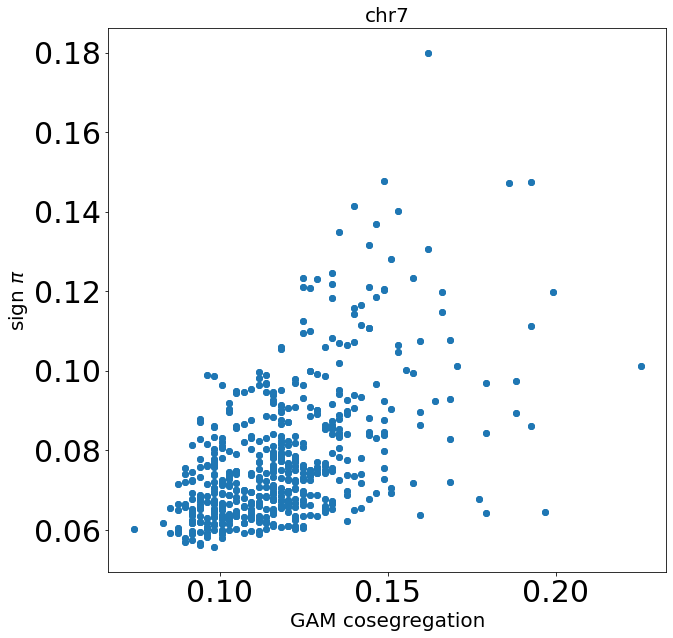

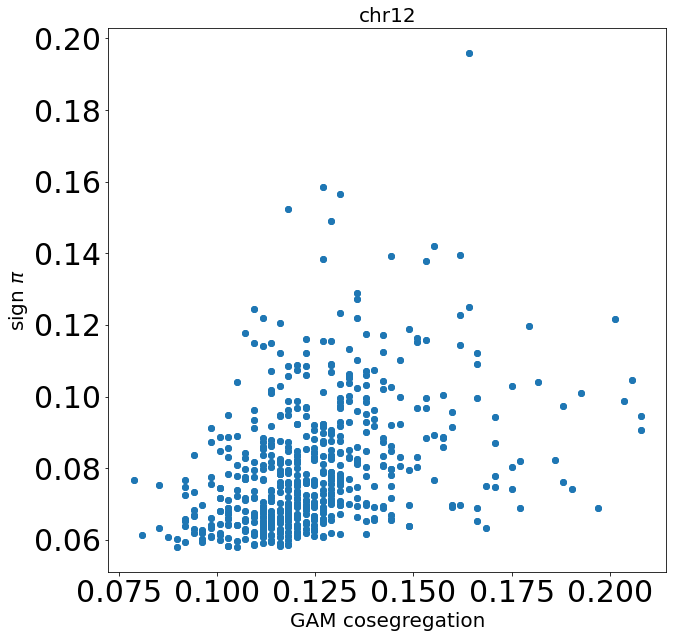

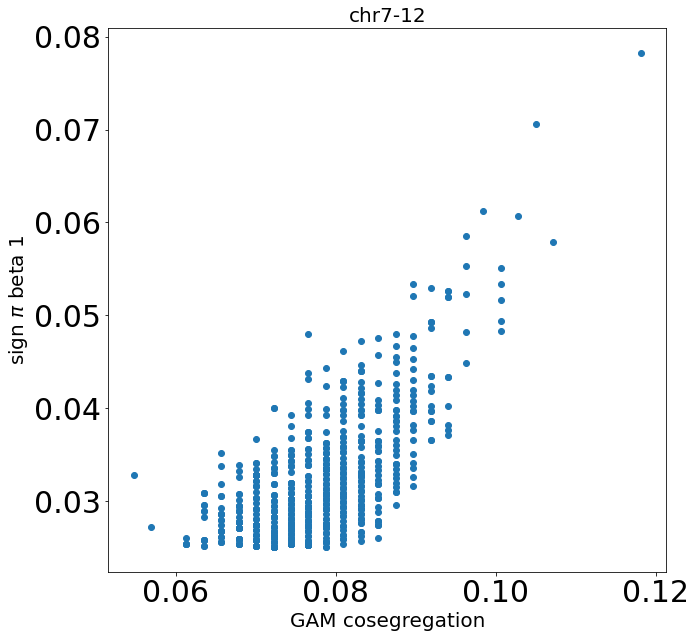

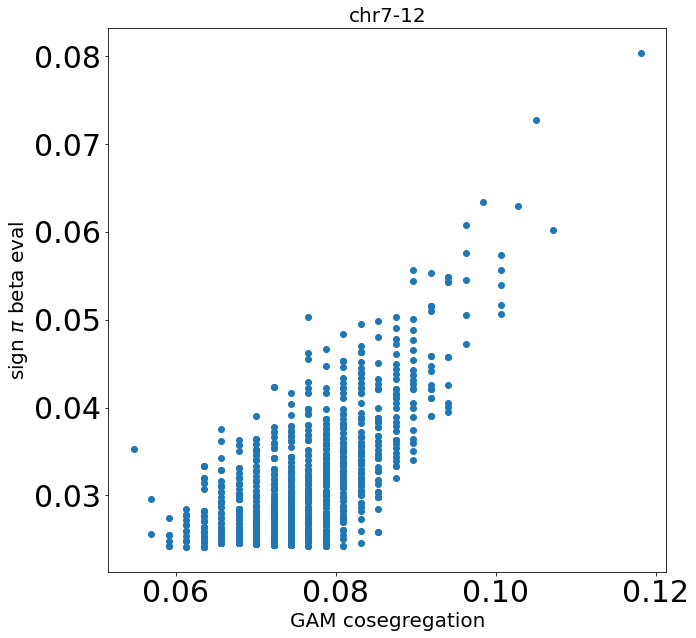

In [23]:
fig, ax = plt.subplots(1, figsize = (10,10))

mat = chr7_1NP_1Mb_coseg
mat_1 = np.copy(chr7_1NP_1Mb_sign_pi)


ax.scatter(mat, mat_1);
ax.set_xlabel("GAM cosegregation", fontsize = 20);
ax.set_ylabel("sign $\pi$", fontsize = 20);
#ax.set_xscale('log')
ax.set_title("chr7", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = chr12_1NP_1Mb_coseg
mat_1 = np.copy(chr12_1NP_1Mb_sign_pi)


ax.scatter(mat, mat_1);
ax.set_xlabel("GAM cosegregation", fontsize = 20);
ax.set_ylabel("sign $\pi$", fontsize = 20);
#ax.set_xscale('log')
ax.set_title("chr12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1


fig, ax = plt.subplots(1, figsize = (10,10))

mat = chr7_12_1NP_1Mb_coseg
mat_1 = np.copy(chr7_12_1NP_1Mb_sign_pi_beta_1)


ax.scatter(mat, mat_1);
ax.set_xlabel("GAM cosegregation", fontsize = 20);
ax.set_ylabel("sign $\pi$ beta 1", fontsize = 20);

#ax.set_xscale('log')
ax.set_title("chr7-12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = chr7_12_1NP_1Mb_coseg
mat_1 = np.copy(chr7_12_1NP_1Mb_sign_pi_beta_eval)


ax.scatter(mat, mat_1);
ax.set_xlabel("GAM cosegregation", fontsize = 20);
ax.set_ylabel("sign $\pi$ beta eval", fontsize = 20);

#ax.set_xscale('log')
ax.set_title("chr7-12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1



In [24]:
mat = chr7_1NP_1Mb_coseg
mat_1 = np.copy(chr7_1NP_1Mb_pi)

In [25]:
mat_1.shape

(146, 146)

# Hi-C data #

In [26]:
import hicstraw

In [27]:
hic_file_name = "/home/federico/Università/Tesi_magistrale/Yan_et_al_2018/" + "4DNFI3JYF9VS.hic"
hic = hicstraw.HiCFile(hic_file_name)
chr1 = hic.getChromosomes()[1]
print(chr1.length)
print(hic.getResolutions())

195471971
[10000000, 5000000, 2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 2000, 1000]


In [28]:
gw_hic = np.zeros((size, size))


for i in tqdm(range(n_chromosomes), leave=True):
    for j in tqdm(range(i, n_chromosomes), leave=False):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
                

        if i==j:
            current_chrom_hic = hic.getChromosomes()[i+1]
            name = current_chrom_hic.name
            start = 0;  end = current_chrom_hic.length 
            mzd = hic.getMatrixZoomData(name, name, "observed", "KR", "BP", 1000000)
            mat = mzd.getRecordsAsMatrix(start, end, start,end)
            gw_hic[start_row:stop_row, start_column:stop_column] = mat
            
        else:

            current_chrom_hic_1 = hic.getChromosomes()[i+1]
            current_chrom_hic_2 = hic.getChromosomes()[j+1]
            name_1 = current_chrom_hic_1.name
            name_2 = current_chrom_hic_2.name
            start_1 = 0;  end_1 = current_chrom_hic_1.length 
            start_2 = 0;  end_2 = current_chrom_hic_2.length 
            
            mzd = hic.getMatrixZoomData(name_1, name_2, "observed", "KR", "BP", 1000000)
            mat = mzd.getRecordsAsMatrix(start_1, end_1, start_2,end_2)
            gw_hic[start_row:stop_row, start_column:stop_column] = mat

gw_hic[gw_hic == 0] = np.nan

100%|██████████| 19/19 [00:00<00:00, 30.26it/s]


## Hi-C ##

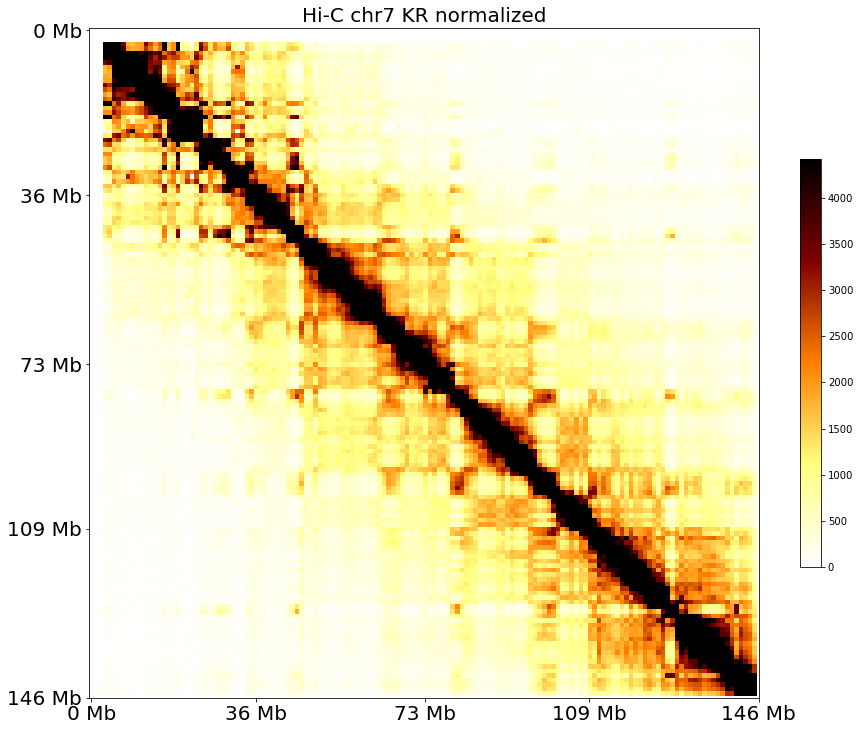

In [29]:
chr7_start, chr7_end, chr12_start, chr12_end = select_chromosomes_coordinates(7, 12, chr_windows_sizes)
hic_selected_locus = gw_hic[chr7_start: chr7_end, chr7_start: chr7_end]

fig, ax, c, _ = plot_heatmap(hic_selected_locus, vmin = 0, vmax = np.nanpercentile(hic_selected_locus, 95) ,x_figsize=15, y_figsize=15)

x_ticks = np.linspace(0, hic_selected_locus.shape[1], 5, dtype=int)
x_ticks_labels = [str(i) + " Mb" for i in x_ticks]
y_ticks = np.linspace(0, hic_selected_locus.shape[0], 5, dtype=int)
y_ticks_labels = [str(i) + " Mb" for i in y_ticks]

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels(x_ticks_labels, fontsize = 20);
ax.set_yticklabels(y_ticks_labels, fontsize = 20);
ax.set_title("Hi-C chr7 KR normalized", fontsize = 20)


del hic_selected_locus

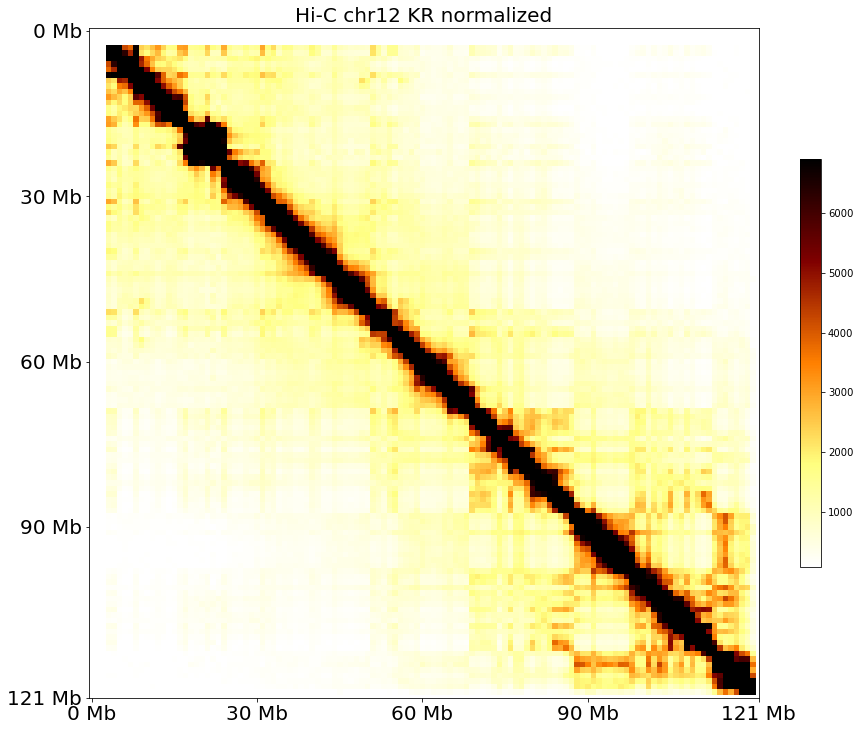

In [30]:
chr7_start, chr7_end, chr12_start, chr12_end = select_chromosomes_coordinates(7, 12, chr_windows_sizes)
hic_selected_locus = gw_hic[chr12_start: chr12_end, chr12_start: chr12_end]

fig, ax, c, _ = plot_heatmap(hic_selected_locus, vmin = np.nanpercentile(hic_selected_locus, 2), vmax = np.nanpercentile(hic_selected_locus, 95.5) ,x_figsize=15, y_figsize=15)

x_ticks = np.linspace(0, hic_selected_locus.shape[1], 5, dtype=int)
x_ticks_labels = [str(i) + " Mb" for i in x_ticks]
y_ticks = np.linspace(0, hic_selected_locus.shape[0], 5, dtype=int)
y_ticks_labels = [str(i) + " Mb" for i in y_ticks]

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels(x_ticks_labels, fontsize = 20);
ax.set_yticklabels(y_ticks_labels, fontsize = 20);
ax.set_title("Hi-C chr12 KR normalized", fontsize = 20)


del hic_selected_locus

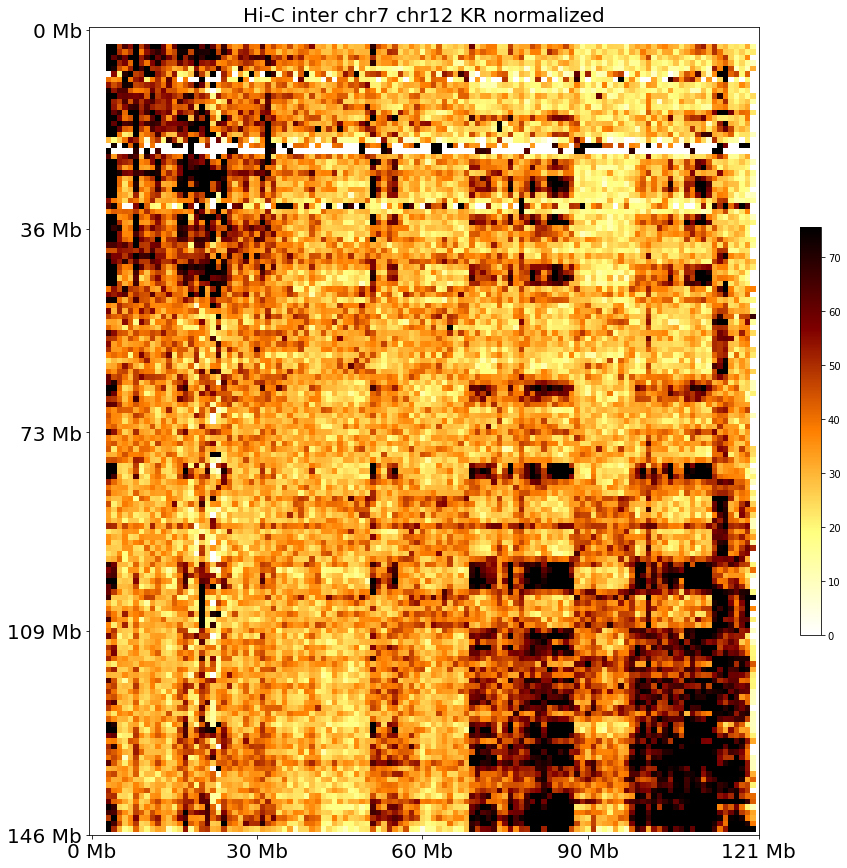

In [31]:
chr7_start, chr7_end, chr12_start, chr12_end = select_chromosomes_coordinates(7, 12, chr_windows_sizes)
hic_selected_locus = gw_hic[chr7_start: chr7_end, chr12_start: chr12_end]

fig, ax, c, _ = plot_heatmap(hic_selected_locus, vmin = 0, vmax = np.nanpercentile(hic_selected_locus, 95) ,x_figsize=15, y_figsize=15)

chr7_ticks = np.linspace(0, hic_selected_locus.shape[1], 5, dtype=int)
chr7_tick_labels = [str(i) + " Mb" for i in chr7_ticks]
chr12_ticks = np.linspace(0, hic_selected_locus.shape[0], 5, dtype=int)
chr12_tick_labels = [str(i) + " Mb" for i in chr12_ticks]

ax.set_xticks(chr7_ticks)
ax.set_yticks(chr12_ticks)
ax.set_xticklabels(chr7_tick_labels, fontsize = 20);
ax.set_yticklabels(chr12_tick_labels, fontsize = 20);
ax.set_title("Hi-C inter chr7 chr12 KR normalized", fontsize = 20)


del hic_selected_locus

In [32]:
hic_means = np.zeros((19,19))
for i in range(n_chromosomes):
    for j in range(n_chromosomes):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
        chrA = chromosomes[i]
        chrB = chromosomes[j]
        
        hic_means[i, j] = np.nanmean(gw_hic[start_row:stop_row, start_column:stop_column])

<ipython-input-32-c84afb48d528>:11: RuntimeWarning: Mean of empty slice
  hic_means[i, j] = np.nanmean(gw_hic[start_row:stop_row, start_column:stop_column])


## Hi-C $\pi$ correlation ? ##

SpearmanrResult(correlation=0.6144575533108239, pvalue=0.0)
(0.5069855650169791, 0.0)
SpearmanrResult(correlation=0.5662805462277509, pvalue=0.0)
(0.5019903408272602, 0.0)
SpearmanrResult(correlation=0.04079647673056891, pvalue=3.998308203137853e-06)
(0.02739055819396728, 0.0019654049409533127)


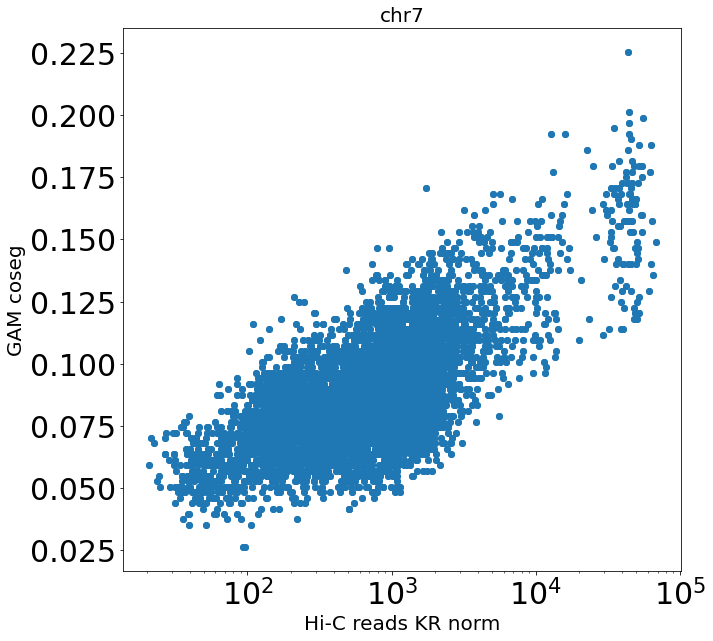

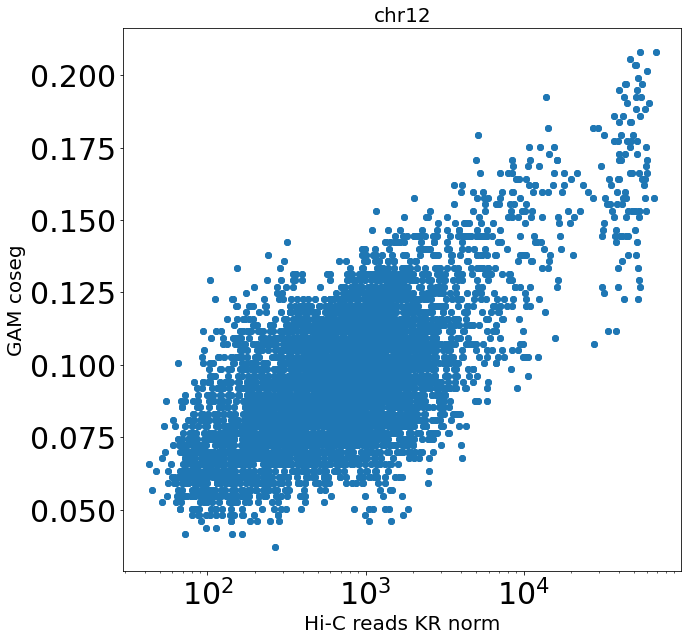

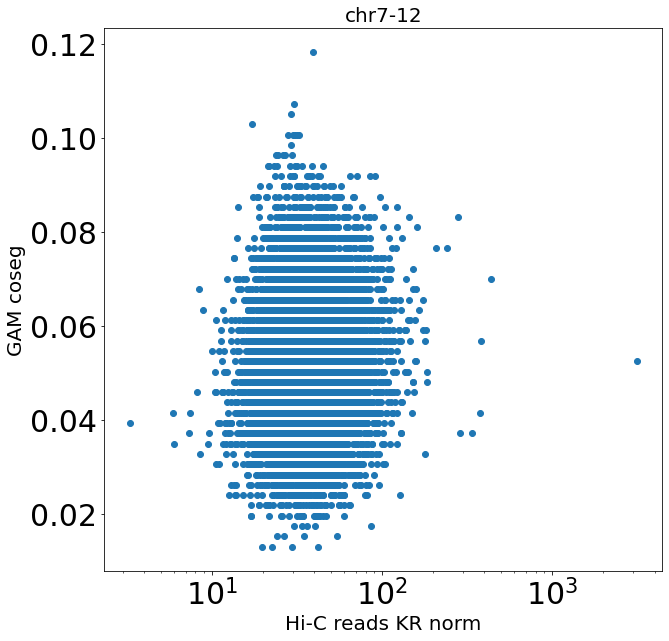

In [33]:
fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr7_start: chr7_end, chr7_start: chr7_end]
mat_1 = np.copy(chr7_1NP_1Mb_coseg)
mat_1[mat_1 == 0] = np.nan

ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("GAM coseg", fontsize = 20);
ax.set_xscale('log')
ax.set_title("chr7", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr12_start: chr12_end, chr12_start: chr12_end]
mat_1 = np.copy(chr12_1NP_1Mb_coseg)
mat_1[mat_1 == 0] = np.nan

ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("GAM coseg", fontsize = 20);
ax.set_xscale('log')
ax.set_title("chr12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr7_start: chr7_end, chr12_start: chr12_end]
mat_1 = np.copy(chr7_12_1NP_1Mb_coseg)
mat_1[mat_1 == 0] = np.nan

ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("GAM coseg", fontsize = 20);

ax.set_xscale('log')
ax.set_title("chr7-12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1






SpearmanrResult(correlation=0.1961562915511988, pvalue=3.176556302237684e-54)
(0.12776953623323128, 9.885525183380658e-24)
SpearmanrResult(correlation=0.09643826904702846, pvalue=3.416512868234249e-14)
(0.11440902977068952, 2.1994097681384047e-19)
SpearmanrResult(correlation=-0.005086860314029545, pvalue=0.7010522791495205)
(-0.010486514750566354, 0.4286967953741566)


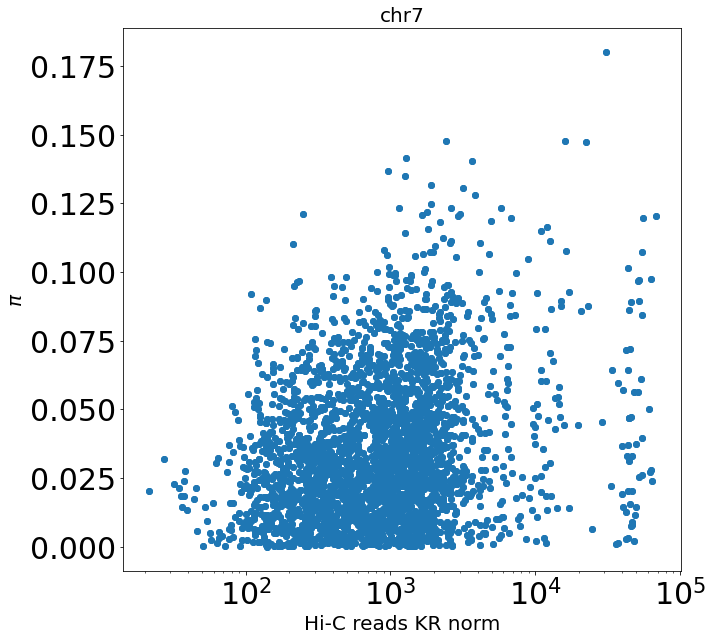

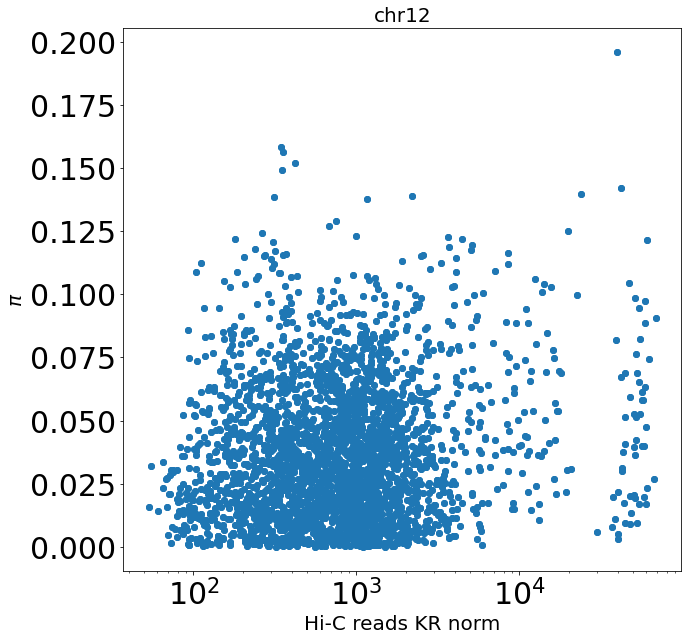

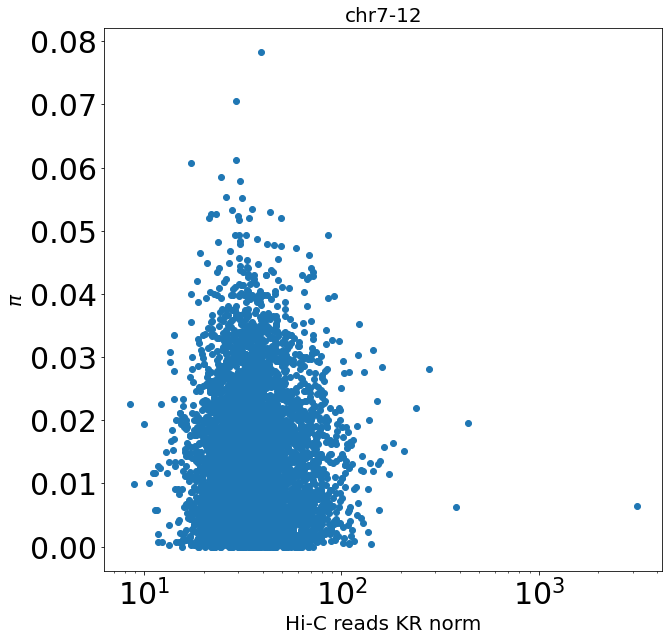

In [34]:
fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr7_start: chr7_end, chr7_start: chr7_end]
mat_1 = np.copy(chr7_1NP_1Mb_pi)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("$\pi$", fontsize = 20);
ax.set_xscale('log')
ax.set_title("chr7", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr12_start: chr12_end, chr12_start: chr12_end]
mat_1 = np.copy(chr12_1NP_1Mb_pi)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("$\pi$", fontsize = 20);
ax.set_xscale('log')
ax.set_title("chr12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1


fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr7_start: chr7_end, chr12_start: chr12_end]
mat_1 = np.copy(chr7_12_1NP_1Mb_pi_beta_1)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("$\pi$", fontsize = 20);

ax.set_xscale('log')
ax.set_title("chr7-12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1



SpearmanrResult(correlation=0.3896385234666516, pvalue=2.4661530151433218e-40)
(0.2745677959848422, 4.6054082509888693e-20)
SpearmanrResult(correlation=0.18113887700228587, pvalue=6.553986196844835e-10)
(0.16057909609351567, 4.61354404309171e-08)
SpearmanrResult(correlation=-0.01693545890527931, pvalue=0.6464500039613612)
(-0.05698272119246904, 0.12245998399356721)


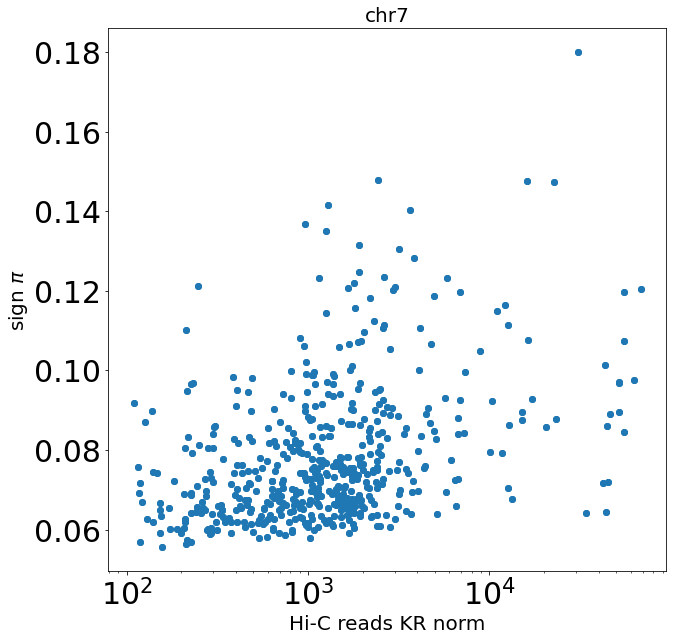

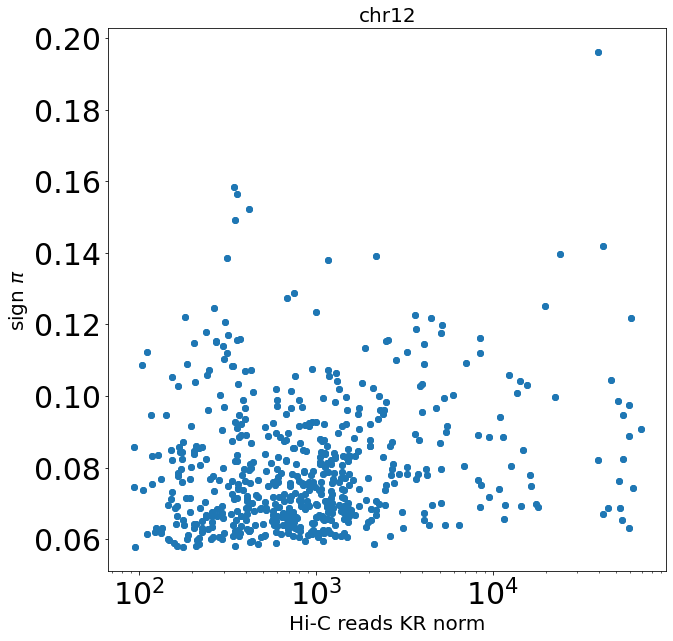

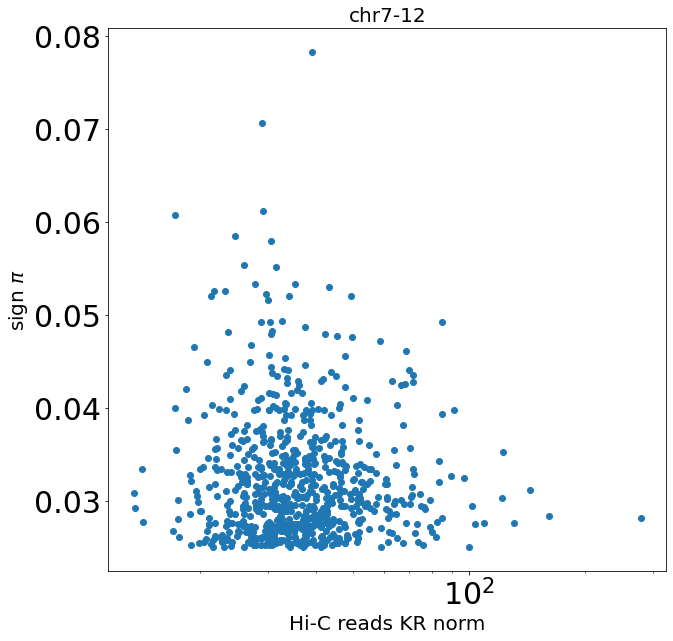

In [35]:
fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr7_start: chr7_end, chr7_start: chr7_end]
mat_1 = np.copy(chr7_1NP_1Mb_sign_pi)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("sign $\pi$", fontsize = 20);
ax.set_xscale('log')
ax.set_title("chr7", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr12_start: chr12_end, chr12_start: chr12_end]
mat_1 = np.copy(chr12_1NP_1Mb_sign_pi)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("sign $\pi$", fontsize = 20);
ax.set_xscale('log')
ax.set_title("chr12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr7_start: chr7_end, chr12_start: chr12_end]
mat_1 = np.copy(chr7_12_1NP_1Mb_sign_pi_beta_1)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("sign $\pi$", fontsize = 20);

ax.set_xscale('log')
ax.set_title("chr7-12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1



# _____ #